# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/Comparison/'
X,y = DS.LoadData('ElipticRings')

# Applying T-SNE

In [4]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

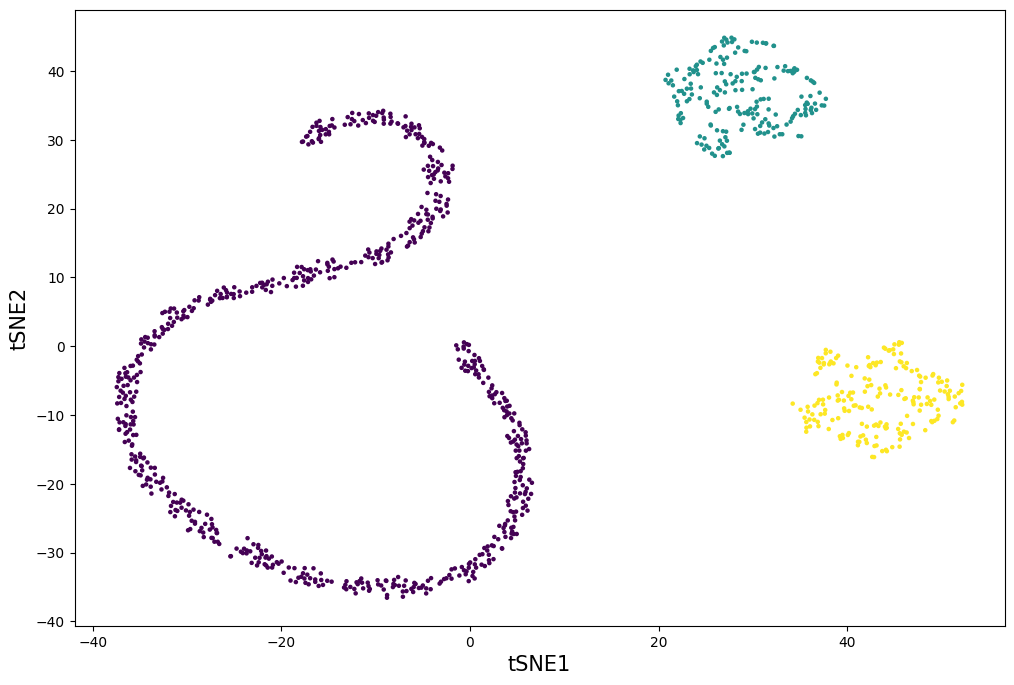

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=5)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'EllipticRing_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [6]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

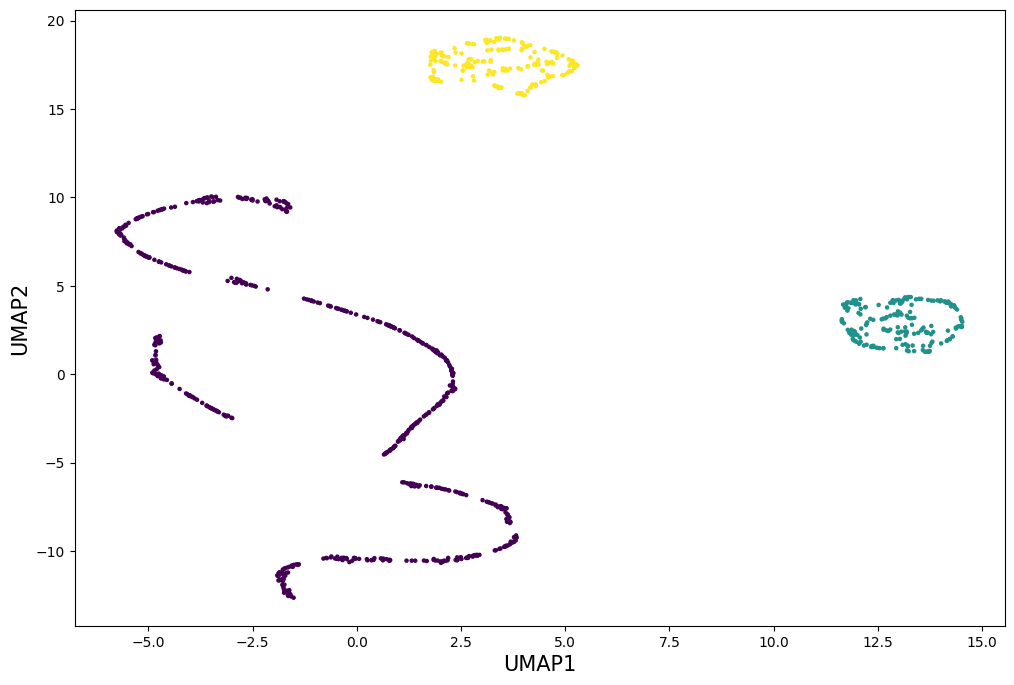

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=y,s=5)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'EllipticRing_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [8]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [9]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.470050,0.435633
1,0.244869,0.381622
2,0.276610,0.387584
3,0.064971,0.441104
4,0.532815,0.386586
5,0.290784,0.341818
6,0.203098,0.357705
7,0.133782,0.429879
8,0.434487,0.327467
9,0.324639,0.375620


# Projecting data into high dimension and applying other methods
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [10]:
from D2toD9 import Convert
X_9D = Convert(X)

# Applying T-SNE

In [11]:
X_tsne = Md.UseMethod('TSNE', X_9D)

# Plotting the results

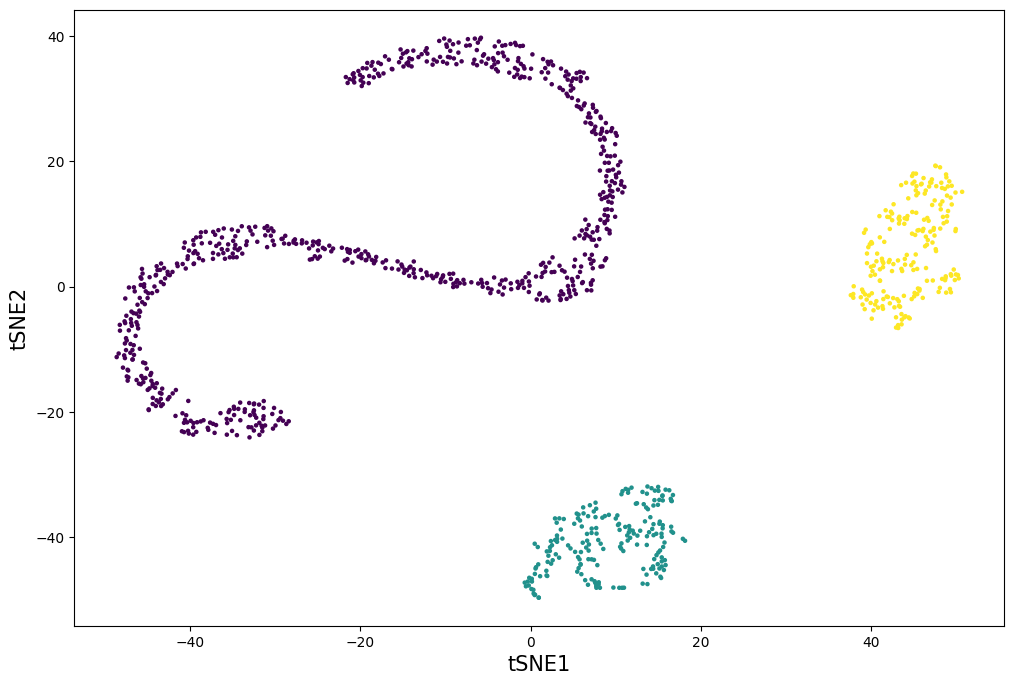

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=5)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'EllipticRing_tSNE_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [13]:
X_umap = Md.UseMethod('UMAP', X_9D)

# Plotting the results

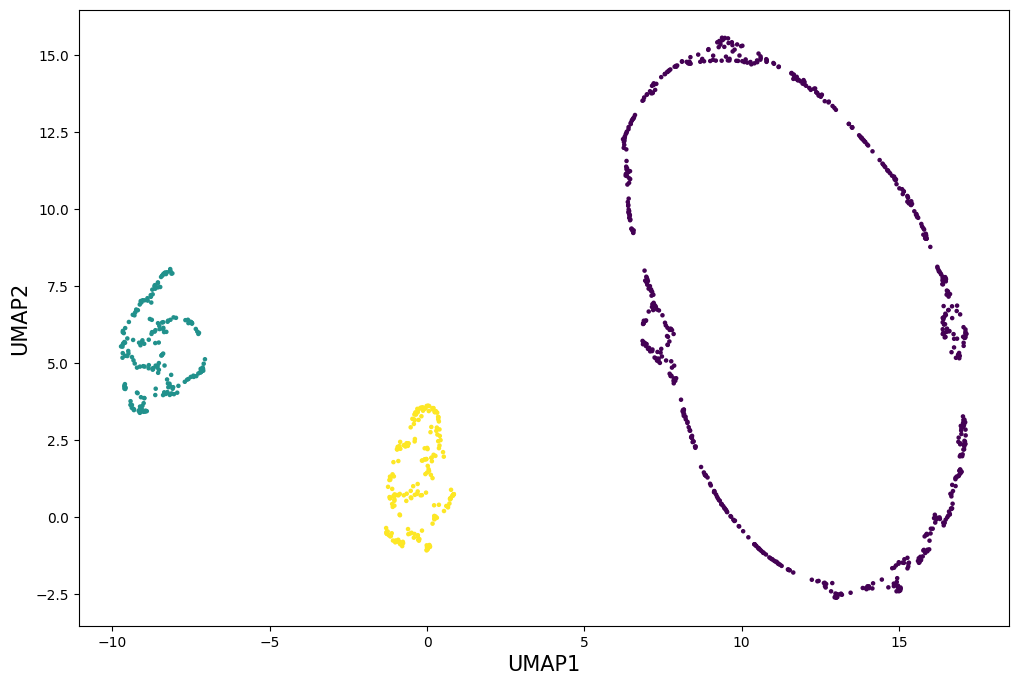

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=y,s=5)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'EllipticRing_UMAP_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [15]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [16]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.336151,0.205563
1,0.215542,0.095396
2,0.066510,0.088234
3,0.018559,0.115903
4,0.268805,0.028088
5,0.241142,0.010678
6,0.261724,0.062499
7,0.057547,0.076962
8,0.016793,0.036442
9,0.135338,0.078515
